In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm joblib category-encoders catboost


In [ ]:
pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 4.2 MB/s eta 0:00:25
    --------------------------------------- 1.3/102.5 MB 4.0 MB/s eta 0:00:26
    --------------------------------------- 2.1/102.5 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 3.1/102.5 MB 4.0 MB/s eta 0:00:25
   - -------------------------------------- 3.9/102.5 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 4.2/102.5 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 4.5/102.5 MB 3.5 MB/s eta 0:00:28
   - -------------------------------------- 4.7/102.5 MB 3.2 MB/s eta 0:00:31
   - -------------------------------------- 5.0/102.5 MB 2.9 MB/s eta 0:00:34
   -- ------------------------------------- 5.2/102.5 MB 2.7 MB/s eta 0:00:37
   -- ------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Deepaky\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



🌾 PRODUCTION-READY CROP RECOMMENDATION SYSTEM

[STEP 1] Loading and Exploring Dataset...

📊 Dataset Overview:
  • Total Records: 242,361
  • Features: 7
  • Columns: ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']

First 5 rows:
                    State_Name District_Name  Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
1  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
2  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

Dataset Information:
<class 'pandas.

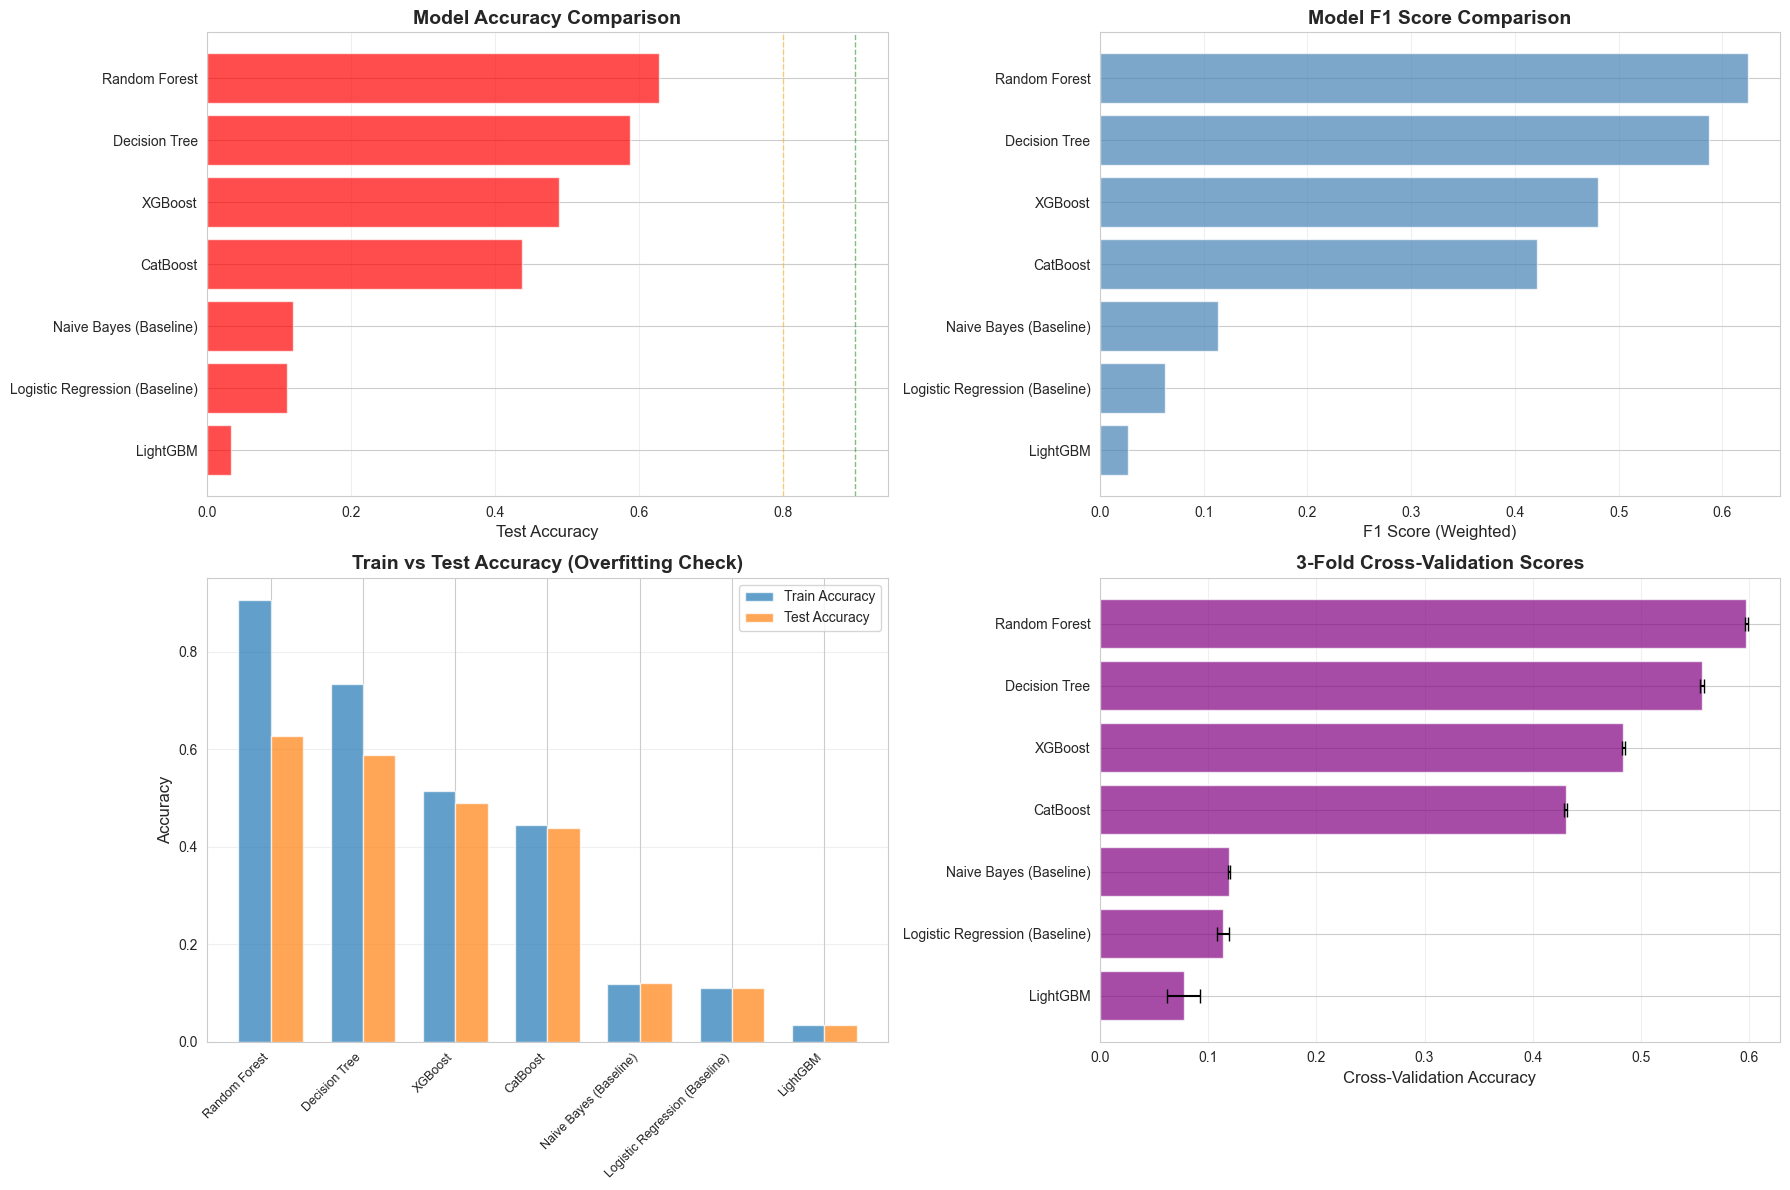


[STEP 8] Detailed Analysis of Best Model

📋 Classification Report (Top 15 Crops):
                   precision    recall  f1-score   support

             Rice       0.82      0.80      0.81      3016
            Maize       0.65      0.71      0.68      2745
Moong(Green Gram)       0.51      0.58      0.55      2008
             Urad       0.47      0.52      0.49      1934
          Sesamum       0.51      0.62      0.56      1745
        Groundnut       0.50      0.55      0.53      1746
            Wheat       0.84      0.86      0.85      1575
        Sugarcane       0.92      0.93      0.92      1563
Rapeseed &Mustard       0.59      0.68      0.64      1502
        Arhar/Tur       0.44      0.53      0.48      1491
             Gram       0.55      0.59      0.57      1437
            Jowar       0.45      0.41      0.43      1393
            Onion       0.77      0.80      0.78      1396
           Potato       0.81      0.81      0.81      1382
     Dry chillies       0.64   

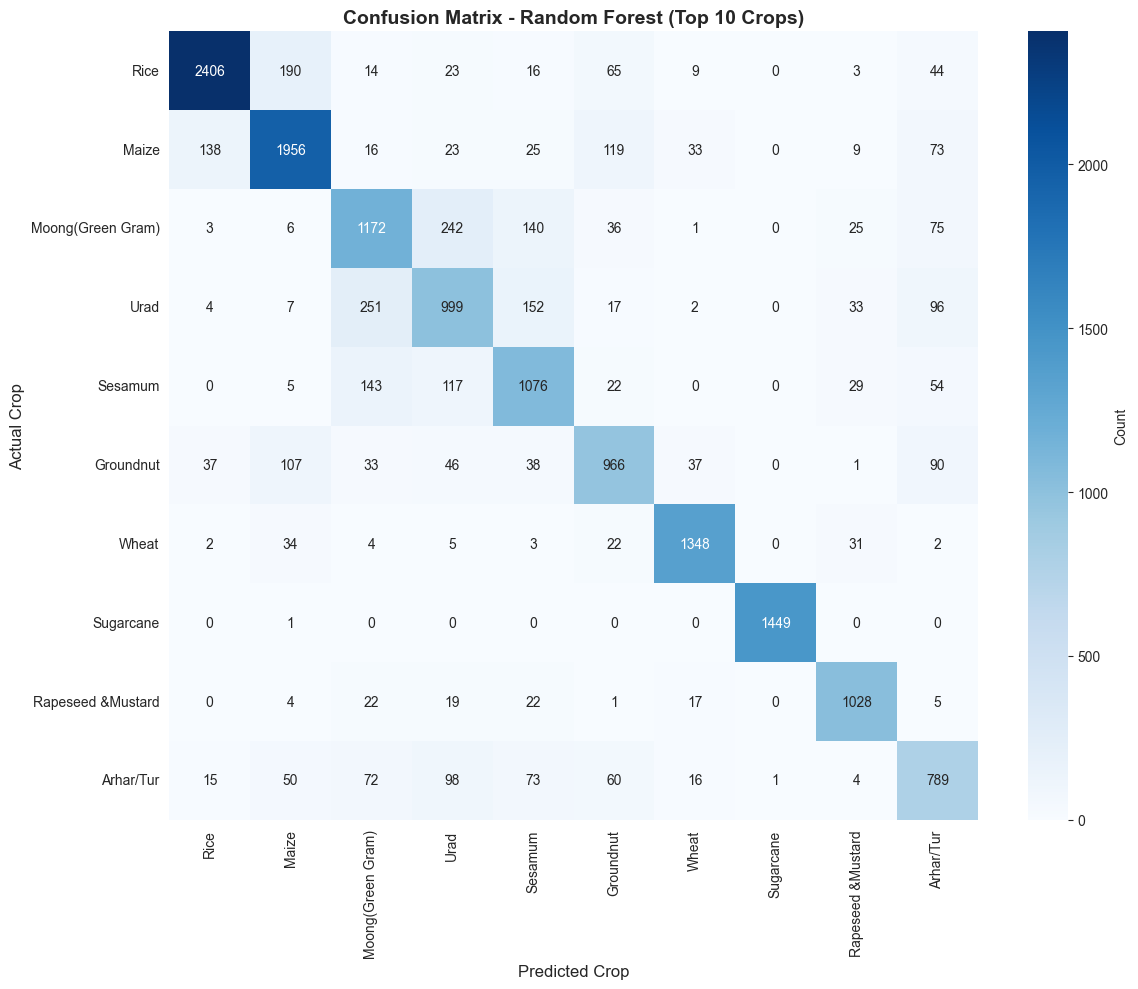


📈 Feature Importance:
               Feature  Importance
0           State_Name    0.155626
9   Productivity_Index    0.134404
6                Yield    0.132943
1        District_Name    0.118252
3               Season    0.106634
8       Production_Log    0.062324
7             Area_Log    0.061607
4                 Area    0.061161
5           Production    0.061126
10   Years_Since_Start    0.053158
  ✓ Saved: feature_importance.png


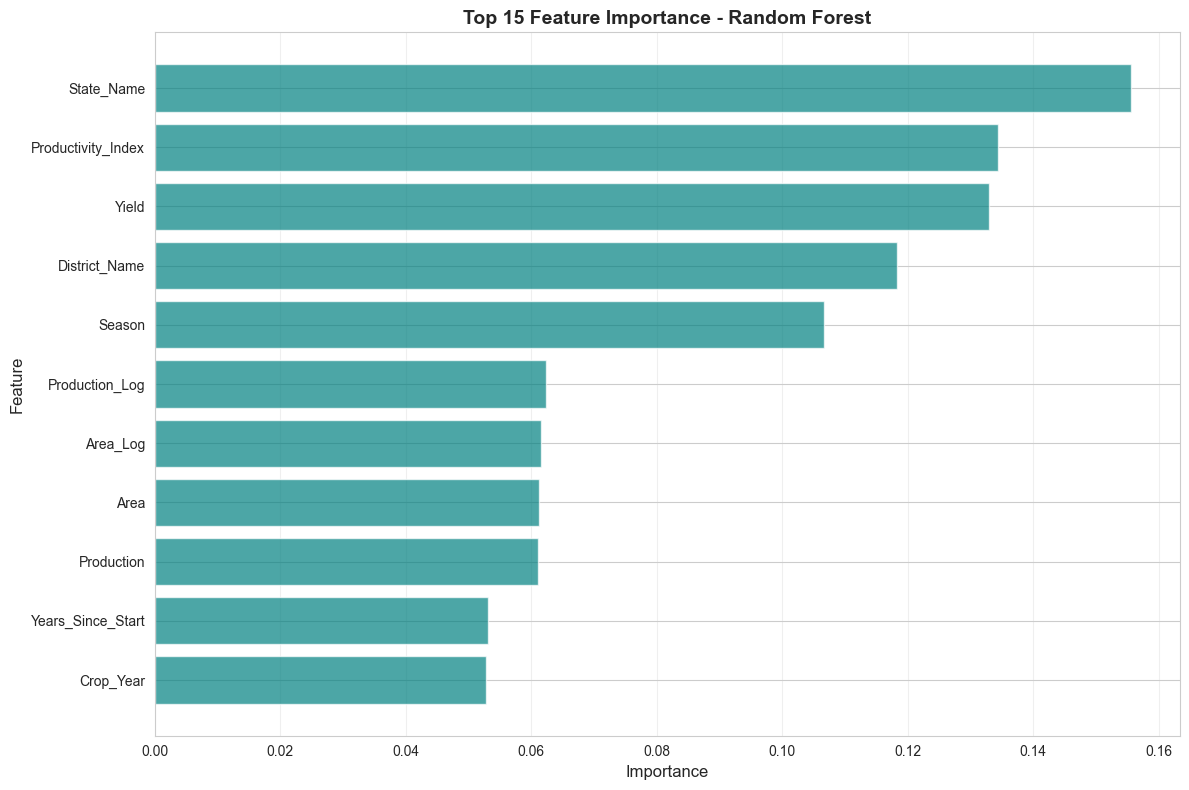


[STEP 9] Saving Models and Preprocessing Objects

✓ Best model saved: best_crop_recommendation_model.joblib
✓ All models saved: all_crop_models.pkl
✓ Feature scaler saved: feature_scaler.pkl
✓ Target encoder saved: target_encoder.pkl
✓ Crop encoder saved: crop_label_encoder.pkl
✓ Metadata saved: model_metadata.pkl
✓ Results saved: model_comparison_results.csv

[STEP 10] Creating Prediction Function

✓ Prediction function saved: crop_prediction_function.pkl

[STEP 11] Demo Predictions

🌾 TEST CASE 1
Input:
  • State: Punjab
  • District: Ludhiana
  • Year: 2020
  • Season: Kharif
  • Area: 500 hectares
  • Production: 2000 tonnes

✅ Prediction Results:
  🏆 Recommended Crop: Maize
  📊 Confidence: 37.55%
  📈 Expected Yield: 2.65 tonnes/hectare
  📉 Input Yield: 4.00 tonnes/hectare

  Top 3 Recommendations:
    1. Maize - 37.55%
    2. Bajra - 14.97%
    3. Mesta - 9.74%

🌾 TEST CASE 2
Input:
  • State: Maharashtra
  • District: Pune
  • Year: 2020
  • Season: Rabi
  • Area: 300 hectares
 

In [1]:
# 🌾 PRODUCTION-READY CROP RECOMMENDATION SYSTEM
# Advanced Multi-Class Classification with Feature Engineering
# Dataset: cleaned_crop_data.csv
# Goal: Predict the best crop for given conditions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, precision_score,
                             recall_score, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

# Try to import category_encoders, if not available use LabelEncoder
try:
    from category_encoders import TargetEncoder
    USE_TARGET_ENCODER = True
except ImportError:
    print("⚠ category_encoders not installed. Using LabelEncoder instead.")
    print("Install with: pip install category-encoders")
    USE_TARGET_ENCODER = False

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

print("="*90)
print("🌾 PRODUCTION-READY CROP RECOMMENDATION SYSTEM")
print("="*90)

# ==============================================================================
# STEP 1: LOAD AND EXPLORE DATA
# ==============================================================================

print("\n[STEP 1] Loading and Exploring Dataset...")
df = pd.read_csv('cleaned_crop_data.csv')

print(f"\n📊 Dataset Overview:")
print(f"  • Total Records: {len(df):,}")
print(f"  • Features: {df.shape[1]}")
print(f"  • Columns: {list(df.columns)}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution (Top 15 Crops):")
crop_dist = df['Crop'].value_counts()
print(crop_dist.head(15))

print(f"\n  • Total Unique Crops: {df['Crop'].nunique()}")
print(f"  • Total Unique States: {df['State_Name'].nunique()}")
print(f"  • Total Unique Districts: {df['District_Name'].nunique()}")
print(f"  • Year Range: {df['Crop_Year'].min()} - {df['Crop_Year'].max()}")

# ==============================================================================
# STEP 2: DATA CLEANING & PREPROCESSING
# ==============================================================================

print("\n" + "="*90)
print("[STEP 2] Data Cleaning & Preprocessing")
print("="*90)

# Remove records with zero or negative Area/Production
print("\n✓ Removing invalid records (Area ≤ 0 or Production ≤ 0)...")
initial_count = len(df)
df = df[(df['Area'] > 0) & (df['Production'] > 0)].copy()
removed_count = initial_count - len(df)
print(f"  • Removed {removed_count:,} invalid records ({removed_count/initial_count*100:.2f}%)")
print(f"  • Remaining records: {len(df):,}")

# Remove crops with very few samples (less than 10)
print("\n✓ Filtering rare crops (minimum 10 samples)...")
crop_counts = df['Crop'].value_counts()
valid_crops = crop_counts[crop_counts >= 10].index
df = df[df['Crop'].isin(valid_crops)].copy()
print(f"  • Crops with ≥10 samples: {len(valid_crops)}")
print(f"  • Crops filtered out: {len(crop_counts) - len(valid_crops)}")
print(f"  • Final dataset size: {len(df):,}")

# ==============================================================================
# STEP 3: FEATURE ENGINEERING
# ==============================================================================

print("\n" + "="*90)
print("[STEP 3] Feature Engineering")
print("="*90)

# Create Yield feature (most important derived feature)
print("\n✓ Creating 'Yield' feature (Production/Area)...")
df['Yield'] = df['Production'] / df['Area']
print(f"  • Yield statistics:")
print(f"    - Mean: {df['Yield'].mean():.2f}")
print(f"    - Median: {df['Yield'].median():.2f}")
print(f"    - Std: {df['Yield'].std():.2f}")

# Additional derived features for better predictions
print("\n✓ Creating additional features...")

# Log transformations for skewed distributions
df['Area_Log'] = np.log1p(df['Area'])
df['Production_Log'] = np.log1p(df['Production'])

# Create productivity index
df['Productivity_Index'] = df['Yield'] / (df['Yield'].median() + 1)

# Year-based features
df['Years_Since_Start'] = df['Crop_Year'] - df['Crop_Year'].min()

print(f"  • Added features: Yield, Area_Log, Production_Log, Productivity_Index, Years_Since_Start")

# ==============================================================================
# STEP 4: ENCODE CATEGORICAL FEATURES
# ==============================================================================

print("\n" + "="*90)
print("[STEP 4] Encoding Categorical Features")
print("="*90)

# Separate features and target
X = df[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Area', 
        'Production', 'Yield', 'Area_Log', 'Production_Log', 
        'Productivity_Index', 'Years_Since_Start']].copy()
y = df['Crop'].copy()

print(f"\n✓ Original features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

# Encode target variable (Crop)
print("\n✓ Encoding target variable (Crop)...")
le_crop = LabelEncoder()
y_encoded = le_crop.fit_transform(y)
print(f"  • Number of crop classes: {len(le_crop.classes_)}")
print(f"  • Sample crop encoding: {dict(list(zip(le_crop.classes_[:5], range(5))))}")

# Encode categorical features
categorical_cols = ['State_Name', 'District_Name', 'Season']

if USE_TARGET_ENCODER:
    print("\n✓ Using Target Encoding for categorical features (better for tree models)...")
    # Split first to avoid data leakage
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    te = TargetEncoder(cols=categorical_cols, smoothing=1.0)
    X_train_temp[categorical_cols] = te.fit_transform(X_train_temp[categorical_cols], y_train_temp)
    X_test_temp[categorical_cols] = te.transform(X_test_temp[categorical_cols])
    
    X_train = X_train_temp
    X_test = X_test_temp
    y_train = y_train_temp
    y_test = y_test_temp
    
    encoder = te
    
else:
    print("\n✓ Using Label Encoding for categorical features...")
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col + '_Encoded'] = le.fit_transform(X[col])
        encoders[col] = le
        X = X.drop(col, axis=1)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    encoder = encoders

print(f"\n✓ Training set size: {X_train.shape[0]:,}")
print(f"✓ Testing set size: {X_test.shape[0]:,}")
print(f"✓ Feature count: {X_train.shape[1]}")

# ==============================================================================
# STEP 5: NORMALIZE NUMERICAL FEATURES
# ==============================================================================

print("\n" + "="*90)
print("[STEP 5] Normalizing Numerical Features")
print("="*90)

numerical_cols = ['Area', 'Production', 'Yield', 'Area_Log', 'Production_Log', 
                  'Productivity_Index', 'Crop_Year', 'Years_Since_Start']

# Use MinMaxScaler (scales to 0-1 range)
print("\n✓ Applying MinMaxScaler to numerical features...")
scaler = MinMaxScaler()

# Only scale if using LabelEncoder (TargetEncoder already scaled categorical)
if not USE_TARGET_ENCODER:
    # Get numerical columns that exist in the data
    numerical_cols_existing = [col for col in numerical_cols if col in X_train.columns]
else:
    numerical_cols_existing = numerical_cols

X_train[numerical_cols_existing] = scaler.fit_transform(X_train[numerical_cols_existing])
X_test[numerical_cols_existing] = scaler.transform(X_test[numerical_cols_existing])

print(f"  • Scaled features: {numerical_cols_existing}")
print(f"  • Feature range: [0, 1]")

# ==============================================================================
# STEP 6: BUILD AND COMPARE MULTIPLE CLASSIFIERS
# ==============================================================================

print("\n" + "="*90)
print("[STEP 6] Building and Comparing Multiple Classifiers")
print("="*90)

# Define models
models = {
    'Logistic Regression (Baseline)': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'Naive Bayes (Baseline)': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=20, min_samples_split=10, 
                                           min_samples_leaf=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, 
                                           min_samples_split=5, min_samples_leaf=2,
                                           random_state=42, n_jobs=-1),
   

     'CatBoost': CatBoostClassifier(
        iterations=200,
        depth=5,
        learning_rate=0.1,
        random_state=42,
        verbose=False
        )
        ,
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                            random_state=42, n_jobs=-1, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                              random_state=42, n_jobs=-1, verbose=-1)
}

print(f"\n✓ Training and evaluating {len(models)} models...")

results = []

for model_name, model in models.items():
    print(f"\n  → Training {model_name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    
    # Cross-validation (3-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, 
                               scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall,
        'Test_F1': test_f1,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Overfitting': train_accuracy - test_accuracy
    })
    
    print(f"    ✓ Test Accuracy: {test_accuracy:.4f}, F1: {test_f1:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('Test_Accuracy', ascending=False)

print("\n" + "="*90)
print("MODEL COMPARISON RESULTS")
print("="*90)
print(results_df.to_string(index=False))

# Best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   • Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.4f}")
print(f"   • Test F1 Score: {results_df.iloc[0]['Test_F1']:.4f}")

# ==============================================================================
# STEP 7: VISUALIZE MODEL COMPARISON
# ==============================================================================

print("\n[STEP 7] Creating Comparison Visualizations...")

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Accuracy Comparison
ax1 = axes[0, 0]
results_sorted = results_df.sort_values('Test_Accuracy', ascending=True)
colors = ['green' if x > 0.9 else 'orange' if x > 0.8 else 'red' 
          for x in results_sorted['Test_Accuracy']]
ax1.barh(results_sorted['Model'], results_sorted['Test_Accuracy'], color=colors, alpha=0.7)
ax1.axvline(x=0.9, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax1.axvline(x=0.8, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Test Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.grid(axis='x', alpha=0.3)

# 2. F1 Score Comparison
ax2 = axes[0, 1]
results_sorted_f1 = results_df.sort_values('Test_F1', ascending=True)
ax2.barh(results_sorted_f1['Model'], results_sorted_f1['Test_F1'], 
         color='steelblue', alpha=0.7)
ax2.set_xlabel('F1 Score (Weighted)', fontsize=12)
ax2.set_title('Model F1 Score Comparison', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)

# 3. Train vs Test Accuracy (Overfitting Check)
ax3 = axes[1, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax3.bar(x_pos - width/2, results_df['Train_Accuracy'], width, 
        label='Train Accuracy', alpha=0.7)
ax3.bar(x_pos + width/2, results_df['Test_Accuracy'], width, 
        label='Test Accuracy', alpha=0.7)
ax3.set_ylabel('Accuracy', fontsize=12)
ax3.set_title('Train vs Test Accuracy (Overfitting Check)', fontweight='bold', fontsize=14)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=9)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Cross-Validation Scores
ax4 = axes[1, 1]
results_cv = results_df.sort_values('CV_Mean', ascending=True)
ax4.barh(results_cv['Model'], results_cv['CV_Mean'], 
         xerr=results_cv['CV_Std'], color='purple', alpha=0.7, capsize=5)
ax4.set_xlabel('Cross-Validation Accuracy', fontsize=12)
ax4.set_title('3-Fold Cross-Validation Scores', fontweight='bold', fontsize=14)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_visualization.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: model_comparison_visualization.png")
plt.show()

# ==============================================================================
# STEP 8: DETAILED ANALYSIS OF BEST MODEL
# ==============================================================================

print("\n" + "="*90)
print("[STEP 8] Detailed Analysis of Best Model")
print("="*90)

# Retrain best model
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Classification Report
print("\n📋 Classification Report (Top 15 Crops):")
top_15_classes = crop_dist.head(15).index
top_15_encoded = [le_crop.transform([crop])[0] for crop in top_15_classes]
top_15_in_test = [c for c in top_15_encoded if c in y_test]

if len(top_15_in_test) > 0:
    target_names = [le_crop.inverse_transform([i])[0] for i in top_15_in_test]
    report = classification_report(y_test, y_pred_best, 
                                   labels=top_15_in_test,
                                   target_names=target_names,
                                   zero_division=0)
    print(report)

# Confusion Matrix (Top 10 crops)
print("\n📊 Confusion Matrix (Top 10 Most Common Crops):")
top_10_classes = crop_dist.head(10).index
top_10_encoded = [le_crop.transform([crop])[0] for crop in top_10_classes]

# Filter test data for top 10 crops
mask = np.isin(y_test, top_10_encoded)
y_test_top10 = y_test[mask]
y_pred_top10 = y_pred_best[mask]

if len(y_test_top10) > 0:
    cm = confusion_matrix(y_test_top10, y_pred_top10, labels=top_10_encoded)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=top_10_classes, yticklabels=top_10_classes,
                cbar_kws={'label': 'Count'})
    plt.xlabel('Predicted Crop', fontsize=12)
    plt.ylabel('Actual Crop', fontsize=12)
    plt.title(f'Confusion Matrix - {best_model_name} (Top 10 Crops)', 
             fontweight='bold', fontsize=14)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: confusion_matrix.png")
    plt.show()

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    print("\n📈 Feature Importance:")
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'], color='teal', alpha=0.7)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("  ✓ Saved: feature_importance.png")
    plt.show()

# ==============================================================================
# STEP 9: SAVE MODELS AND PREPROCESSING OBJECTS
# ==============================================================================

print("\n" + "="*90)
print("[STEP 9] Saving Models and Preprocessing Objects")
print("="*90)

# Save best model
best_model_filename = 'best_crop_recommendation_model.joblib'
joblib.dump(best_model, best_model_filename, compress=3)
print(f"\n✓ Best model saved: {best_model_filename}")

# Save all models
all_models_filename = 'all_crop_models.pkl'
with open(all_models_filename, 'wb') as f:
    pickle.dump(models, f)
print(f"✓ All models saved: {all_models_filename}")

# Save scaler
scaler_filename = 'feature_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Feature scaler saved: {scaler_filename}")

# Save encoders
if USE_TARGET_ENCODER:
    encoder_filename = 'target_encoder.pkl'
    with open(encoder_filename, 'wb') as f:
        pickle.dump(encoder, f)
    print(f"✓ Target encoder saved: {encoder_filename}")
else:
    encoder_filename = 'label_encoders.pkl'
    with open(encoder_filename, 'wb') as f:
        pickle.dump(encoder, f)
    print(f"✓ Label encoders saved: {encoder_filename}")

# Save crop label encoder
crop_encoder_filename = 'crop_label_encoder.pkl'
with open(crop_encoder_filename, 'wb') as f:
    pickle.dump(le_crop, f)
print(f"✓ Crop encoder saved: {crop_encoder_filename}")

# Save metadata
metadata = {
    'best_model_name': best_model_name,
    'feature_columns': list(X_train.columns),
    'numerical_cols': numerical_cols_existing,
    'categorical_cols': categorical_cols,
    'n_crops': len(le_crop.classes_),
    'crop_classes': list(le_crop.classes_),
    'test_accuracy': results_df.iloc[0]['Test_Accuracy'],
    'test_f1': results_df.iloc[0]['Test_F1'],
    'use_target_encoder': USE_TARGET_ENCODER,
    'train_size': len(X_train),
    'test_size': len(X_test)
}

metadata_filename = 'model_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(metadata, f)
print(f"✓ Metadata saved: {metadata_filename}")

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"✓ Results saved: model_comparison_results.csv")

# ==============================================================================
# STEP 10: CREATE PREDICTION FUNCTION FOR DEPLOYMENT
# ==============================================================================

print("\n" + "="*90)
print("[STEP 10] Creating Prediction Function")
print("="*90)

def predict_crop(state, district, year, season, area, production):
    """
    Predict the best crop for given conditions
    
    Parameters:
    -----------
    state : str
        State name (e.g., 'Punjab')
    district : str
        District name (e.g., 'Ludhiana')
    year : int
        Crop year (e.g., 2024)
    season : str
        Season (e.g., 'Kharif', 'Rabi', 'Whole Year')
    area : float
        Cultivation area in hectares
    production : float
        Expected production in tonnes
    
    Returns:
    --------
    dict : Prediction results with top 3 crops and probabilities
    """
    # Calculate derived features
    yield_val = production / area if area > 0 else 0
    area_log = np.log1p(area)
    production_log = np.log1p(production)
    productivity_index = yield_val / (df['Yield'].median() + 1)
    years_since_start = year - df['Crop_Year'].min()
    
    # Create input DataFrame
    input_data = pd.DataFrame({
        'State_Name': [state],
        'District_Name': [district],
        'Crop_Year': [year],
        'Season': [season],
        'Area': [area],
        'Production': [production],
        'Yield': [yield_val],
        'Area_Log': [area_log],
        'Production_Log': [production_log],
        'Productivity_Index': [productivity_index],
        'Years_Since_Start': [years_since_start]
    })
    
    # Apply encoding
    if USE_TARGET_ENCODER:
        input_data[categorical_cols] = encoder.transform(input_data[categorical_cols])
    else:
        for col in categorical_cols:
            try:
                input_data[col + '_Encoded'] = encoder[col].transform(input_data[col])
                input_data = input_data.drop(col, axis=1)
            except:
                # If unseen category, use mode
                input_data[col + '_Encoded'] = 0
                input_data = input_data.drop(col, axis=1)
    
    # Apply scaling
    input_data[numerical_cols_existing] = scaler.transform(input_data[numerical_cols_existing])
    
    # Ensure correct column order
    input_data = input_data[X_train.columns]
    
    # Predict
    prediction = best_model.predict(input_data)[0]
    probabilities = best_model.predict_proba(input_data)[0]
    
    # Get top 3 predictions
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_crops = le_crop.inverse_transform(top_3_indices)
    top_3_probs = probabilities[top_3_indices]
    
    # Get predicted crop
    predicted_crop = le_crop.inverse_transform([prediction])[0]
    
    # Calculate expected yield
    avg_yield = df[df['Crop'] == predicted_crop]['Yield'].mean() if predicted_crop in df['Crop'].values else yield_val
    
    return {
        'predicted_crop': predicted_crop,
        'confidence': float(probabilities[prediction] * 100),
        'top_3_recommendations': [
            {'crop': crop, 'confidence': float(prob * 100)}
            for crop, prob in zip(top_3_crops, top_3_probs)
        ],
        'expected_yield': float(avg_yield),
        'input_yield': float(yield_val)
    }

# Save prediction function
prediction_function_filename = 'crop_prediction_function.pkl'
with open(prediction_function_filename, 'wb') as f:
    pickle.dump(predict_crop, f)
print(f"\n✓ Prediction function saved: {prediction_function_filename}")

# ==============================================================================
# STEP 11: DEMO PREDICTIONS
# ==============================================================================

print("\n" + "="*90)
print("[STEP 11] Demo Predictions")
print("="*90)

# Test predictions
test_cases = [
    {'state': 'Punjab', 'district': 'Ludhiana', 'year': 2020, 
     'season': 'Kharif', 'area': 500, 'production': 2000},
    {'state': 'Maharashtra', 'district': 'Pune', 'year': 2020, 
     'season': 'Rabi', 'area': 300, 'production': 1500},
    {'state': 'Tamil Nadu', 'district': 'Coimbatore', 'year': 2020, 
     'season': 'Whole Year', 'area': 200, 'production': 1000}
]

for idx, case in enumerate(test_cases, 1):
    print(f"\n{'='*70}")
    print(f"🌾 TEST CASE {idx}")
    print(f"{'='*70}")
    print(f"Input:")
    print(f"  • State: {case['state']}")
    print(f"  • District: {case['district']}")
    print(f"  • Year: {case['year']}")
    print(f"  • Season: {case['season']}")
    print(f"  • Area: {case['area']} hectares")
    print(f"  • Production: {case['production']} tonnes")
    
    try:
        result = predict_crop(case['state'], case['district'], case['year'], 
                             case['season'], case['area'], case['production'])
        
        print(f"\n✅ Prediction Results:")
        print(f"  🏆 Recommended Crop: {result['predicted_crop']}")
        print(f"  📊 Confidence: {result['confidence']:.2f}%")
        print(f"  📈 Expected Yield: {result['expected_yield']:.2f} tonnes/hectare")
        print(f"  📉 Input Yield: {result['input_yield']:.2f} tonnes/hectare")
        
        print(f"\n  Top 3 Recommendations:")
        for i, rec in enumerate(result['top_3_recommendations'], 1):
            print(f"    {i}. {rec['crop']} - {rec['confidence']:.2f}%")
    
    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("  (This may happen with unseen categories in test mode)")

# ==============================================================================
# FINAL SUMMARY
# ==============================================================================

print("\n" + "="*90)
print("✅ CROP RECOMMENDATION SYSTEM - COMPLETE!")
print("="*90)

print(f"\n📊 FINAL STATISTICS:")
print(f"  • Total Crops Classified: {len(le_crop.classes_)}")
print(f"  • Training Samples: {len(X_train):,}")
print(f"  • Testing Samples: {len(X_test):,}")
print(f"  • Best Model: {best_model_name}")
print(f"  • Test Accuracy: {results_df.iloc[0]['Test_Accuracy']:.2%}")
print(f"  • Test F1 Score: {results_df.iloc[0]['Test_F1']:.2%}")

print(f"\n💾 SAVED FILES:")
saved_files = [
    best_model_filename,
    all_models_filename,
    scaler_filename,
    encoder_filename,
    crop_encoder_filename,
    metadata_filename,
    'model_comparison_results.csv',
    'model_comparison_visualization.png',
    'confusion_matrix.png'
]

if hasattr(best_model, 'feature_importances_'):
    saved_files.append('feature_importance.png')

for i, filename in enumerate(saved_files, 1):
    print(f"  {i}. {filename}")

print(f"\n🚀 READY FOR DEPLOYMENT!")
print(f"   Use 'predict_crop()' function for real-time predictions")
print(f"   Integrate with Streamlit/Flask/FastAPI for web deployment")

print("\n" + "="*90)
